In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/kaggle/input/zepto-dataset/zepto_sales_dataset.csv") #load the dataset

In [5]:
print(df.head())
print(df.info())
print(df.describe())   #Explore Data

      Product Name   Category       City  Original Price  Current Price  \
0   Britannia Cake     Snacks      Delhi             148            163   
1   Britannia Cake     Snacks       Pune              81             86   
2   Fortune Oil 1L    Grocery  Hyderabad             138            143   
3      Pepsi 500ml  Beverages      Delhi             127            127   
4  Aashirvaad Atta    Grocery    Chennai              34             49   

   Discount  Orders  Total Revenue Influencer Active  
0         5     283          44714                No  
1        10     284          21584               Yes  
2        10      69           9177                No  
3        10      83           9711                No  
4        10     169           6591               Yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Product Name    

In [6]:
print(df.columns.tolist()) #to list out

['Product Name', 'Category', 'City', 'Original Price', 'Current Price', 'Discount', 'Orders', 'Total Revenue', 'Influencer Active']


In [7]:
# Load dataset
df = pd.read_csv('/kaggle/input/zepto-dataset/zepto_sales_dataset.csv')  
# Clean column names
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

# Check column names
print(df.columns.tolist())

# Drop missing values from required columns
df = df.dropna(subset=['product_name', 'city','original_price', 'current_price', 'discount', 'orders', 'total_revenue', 'influencer_active'])

# Preview cleaned data
df.head()


['product_name', 'category', 'city', 'original_price', 'current_price', 'discount', 'orders', 'total_revenue', 'influencer_active']


,product_name,category,city,original_price,current_price,discount,orders,total_revenue,influencer_active
0,Britannia Cake,Snacks,Delhi,148,163,5,283,44714,No
1,Britannia Cake,Snacks,Pune,81,86,10,284,21584,Yes
2,Fortune Oil 1L,Grocery,Hyderabad,138,143,10,69,9177,No
3,Pepsi 500ml,Beverages,Delhi,127,127,10,83,9711,No
4,Aashirvaad Atta,Grocery,Chennai,34,49,10,169,6591,Yes


In [8]:
# Convert price and orders to numeric
df['original_price'] = pd.to_numeric(df['original_price'], errors='coerce')
df['current_price'] = pd.to_numeric(df['current_price'], errors='coerce')
df['orders'] = pd.to_numeric(df['orders'], errors='coerce')

In [9]:
print(df['original_price'])


0      148
1       81
2      138
3      127
4       34
      ... 
295    198
296    131
297    171
298     94
299    129
Name: original_price, Length: 300, dtype: int64


In [10]:
print(df['current_price'])
print(df['orders'])

0      163
1       86
2      143
3      127
4       49
      ... 
295    198
296    146
297    176
298     99
299    129
Name: current_price, Length: 300, dtype: int64
0      283
1      284
2       69
3       83
4      169
      ... 
295     52
296    146
297    291
298    124
299    272
Name: orders, Length: 300, dtype: int64


In [11]:
df.dropna(subset=['original_price', 'current_price', 'orders'], inplace=True)
print(df)

        product_name   category       city  original_price  current_price  \
0     Britannia Cake     Snacks      Delhi             148            163   
1     Britannia Cake     Snacks       Pune              81             86   
2     Fortune Oil 1L    Grocery  Hyderabad             138            143   
3        Pepsi 500ml  Beverages      Delhi             127            127   
4    Aashirvaad Atta    Grocery    Chennai              34             49   
..               ...        ...        ...             ...            ...   
295   Britannia Cake     Snacks       Pune             198            198   
296  Amul Milk 500ml      Dairy  Hyderabad             131            146   
297    Oreo Biscuits     Snacks      Delhi             171            176   
298  Amul Milk 500ml      Dairy     Mumbai              94             99   
299          Parle-G     Snacks    Chennai             129            129   

     discount  orders  total_revenue influencer_active  
0           5     

In [12]:
# Add calculated revenue if not present
if 'total_revenue' not in df.columns or df['total_revenue'].isnull().all():
    df['total_revenue'] = df['current_price'] * df['orders']

df.head()

,product_name,category,city,original_price,current_price,discount,orders,total_revenue,influencer_active
0,Britannia Cake,Snacks,Delhi,148,163,5,283,44714,No
1,Britannia Cake,Snacks,Pune,81,86,10,284,21584,Yes
2,Fortune Oil 1L,Grocery,Hyderabad,138,143,10,69,9177,No
3,Pepsi 500ml,Beverages,Delhi,127,127,10,83,9711,No
4,Aashirvaad Atta,Grocery,Chennai,34,49,10,169,6591,Yes


In [13]:
# Total revenue
print(f"Total Revenue: ₹{df['total_revenue'].sum():,.2f}")

Total Revenue: ₹5,783,351.00


In [14]:
# Top 10 cities by revenue
top_cities = df.groupby('city')['total_revenue'].sum().sort_values(ascending=False).head(10)
print("Top Cities by Revenue:\n", top_cities)

Top Cities by Revenue:
 city
Hyderabad    1250930
Bangalore    1019724
Pune          993838
Delhi         884943
Chennai       834726
Mumbai        799190
Name: total_revenue, dtype: int64


In [15]:
# Top 10 products by revenue
top_products = df.groupby('product_name')['total_revenue'].sum().sort_values(ascending=False).head(10)
print("Top Products by Revenue:\n", top_products)

Top Products by Revenue:
 product_name
Coca Cola 1L       714681
Maggi Noodles      661477
Parle-G            658853
Nestle Munch       647424
Amul Milk 500ml    579648
Oreo Biscuits      533104
Britannia Cake     520490
Pepsi 500ml        512321
Aashirvaad Atta    497163
Fortune Oil 1L     458190
Name: total_revenue, dtype: int64


In [20]:
# Discount distribution
df['discount'] = pd.to_numeric(df['discount'], errors='coerce')
print(df['discount'])

0       5
1      10
2      10
3      10
4      10
       ..
295     5
296    10
297    10
298     0
299    10
Name: discount, Length: 300, dtype: int64


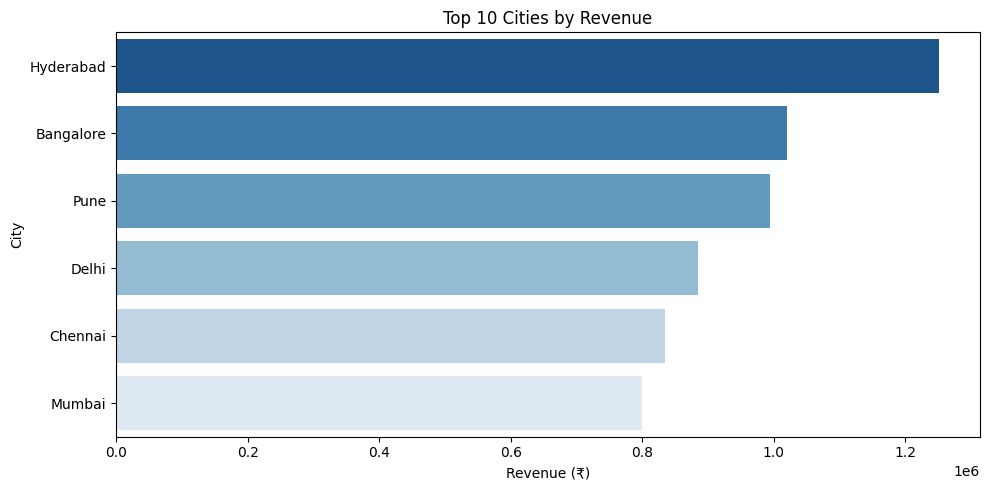

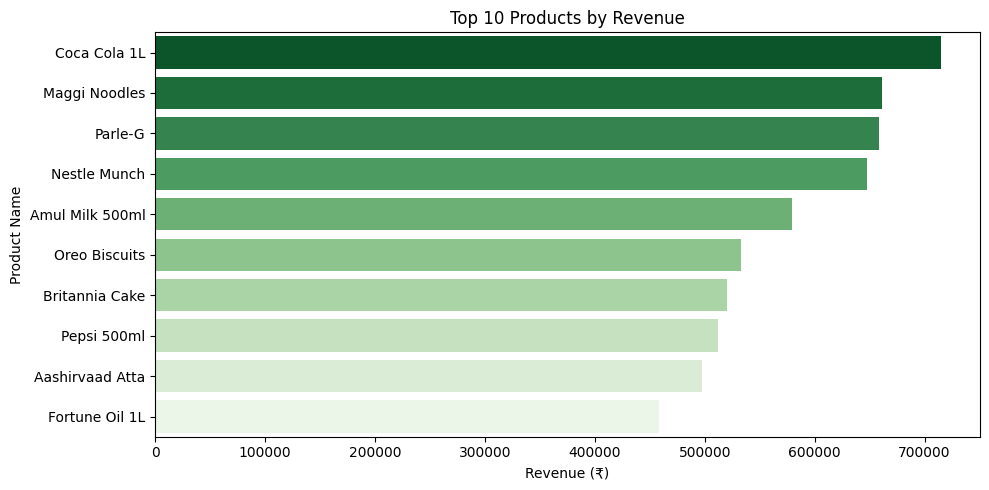

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top cities
plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='Blues_r')
plt.title('Top 10 Cities by Revenue')
plt.xlabel('Revenue (₹)')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# Top products
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='Greens_r')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue (₹)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


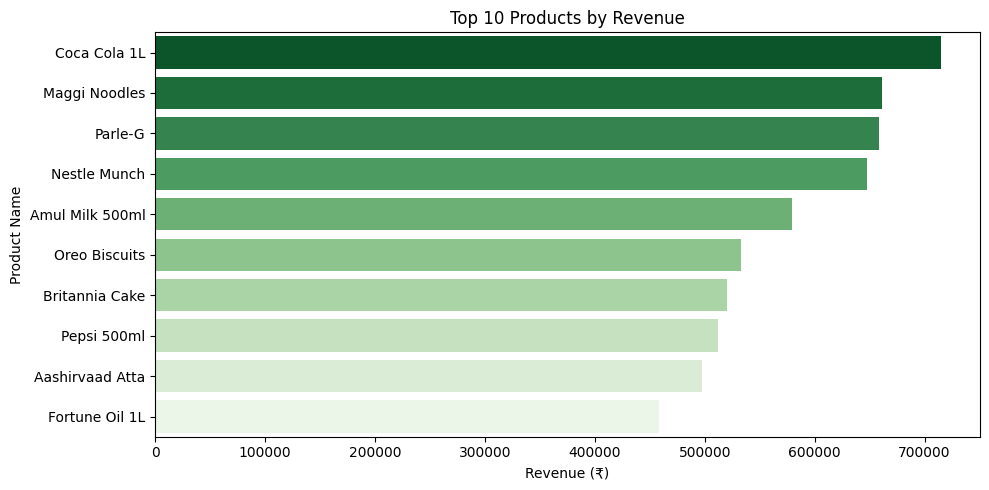

In [22]:

# Top products
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='Greens_r')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue (₹)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

In [24]:
df.to_csv('cleaned_zepto_sales_data.csv', index=False)


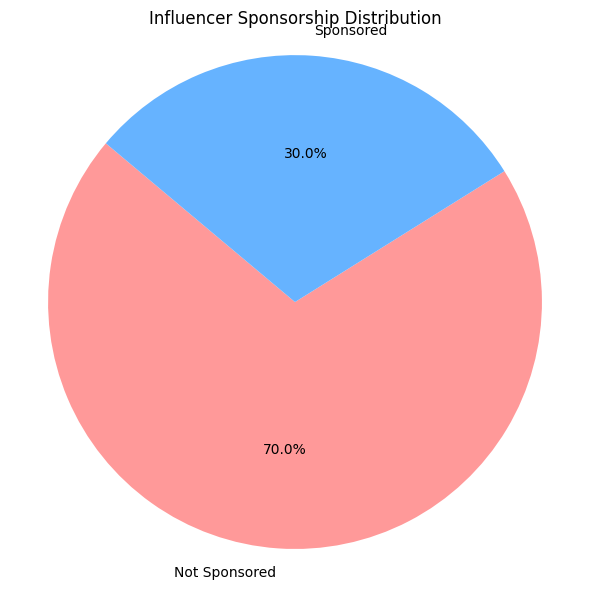

In [26]:
# Count of influencer-sponsored vs non-sponsored products
sponsor_counts = df['influencer_active'].value_counts()

# Pie Chart for Influencer Sponsorship
plt.figure(figsize=(6, 6))
plt.pie(sponsor_counts, labels=['Not Sponsored', 'Sponsored'], autopct='%1.1f%%', colors=['#FF9999','#66B3FF'], startangle=140)
plt.title('Influencer Sponsorship Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()


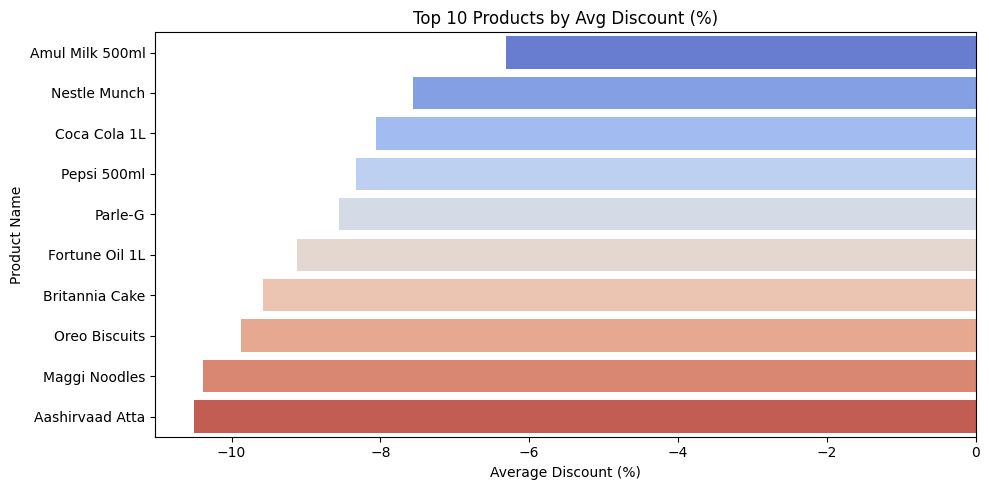

In [27]:
# Calculate Discount %
df['discount_percent'] = ((df['original_price'] - df['current_price']) / df['original_price']) * 100

# Top 10 products with highest discount %
top_discount_products = df.groupby('product_name')['discount_percent'].mean().sort_values(ascending=False).head(10)

# Bar chart: Top 10 Discounted Products
plt.figure(figsize=(10, 5))
sns.barplot(x=top_discount_products.values, y=top_discount_products.index, palette='coolwarm')
plt.title('Top 10 Products by Avg Discount (%)')
plt.xlabel('Average Discount (%)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


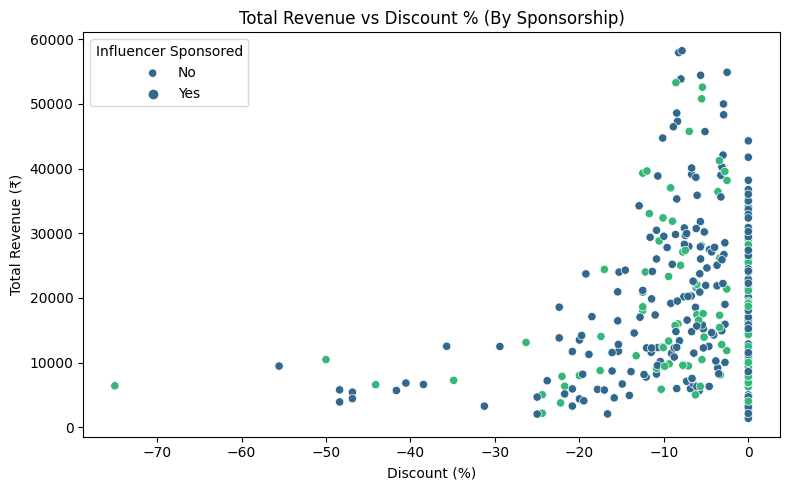

In [28]:
# Scatter plot: Discount % vs Total Revenue
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='discount_percent', y='total_revenue', hue='influencer_active', palette='viridis')
plt.title('Total Revenue vs Discount % (By Sponsorship)')
plt.xlabel('Discount (%)')
plt.ylabel('Total Revenue (₹)')
plt.legend(title='Influencer Sponsored', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


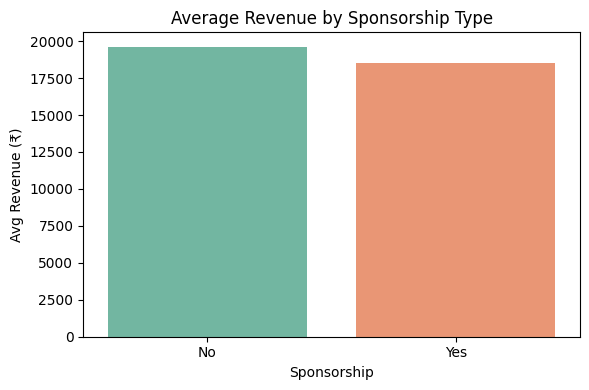

In [29]:
avg_revenue = df.groupby('influencer_active')['total_revenue'].mean().rename({0: 'Not Sponsored', 1: 'Sponsored'})

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_revenue.index, y=avg_revenue.values, palette='Set2')
plt.title('Average Revenue by Sponsorship Type')
plt.xlabel('Sponsorship')
plt.ylabel('Avg Revenue (₹)')
plt.tight_layout()
plt.show()
